# Geometrische Interpretation eines Linearen Gleichungssystems:
## Zeileninterpretation

Dieses Notebook bestimmt die Lösung eines einfachen Linearen Gleichungssytems. 

Es macht dieses **ziemlich Umständlich**, aus didaktischen Gründen: Es soll die geometrische Interpretation dieser Situation verdeutlicht werden. Allgemein können LGS einfach via `np.linalg.solve()` in einer Zeile Gelöst werden.

Gegeben:

$$ 2x +3y = 8$$
$$ 4x - y = 2$$

In [1]:
%pylab inline
import sympy as sp
from sympy.abc import x,y
sx = 6 # plot groesse x.
sy = 3 # plot groesse y.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## EIngabe der Koeffizienten, Aufsetzen der Gleichungen
Die folgenden koeffizienten können geändert werden und bestimmen unser System. 

In [2]:
a1, a2, b1 = 2, 3, 8 #Zeile 1 des Systems.
a3, a4, b2 = 4,-1, 2 #Zeile 2 des Systems.

In [3]:
eq1 = sp.Eq(a1*x + a2*y,b1)
eq1

Eq(2*x + 3*y, 8)

In [4]:
eq2 = sp.Eq(a3*x + a4*y,b2)
eq2

Eq(4*x - y, 2)

## Lösen für $y$

In [5]:
solution1 = sp.solve(eq1, y)
solution2 = sp.solve(eq2, y)

In [6]:
solution1[0]

8/3 - 2*x/3

In [7]:
solution2[0]

4*x - 2

# Plot der geometrischen Interpretation

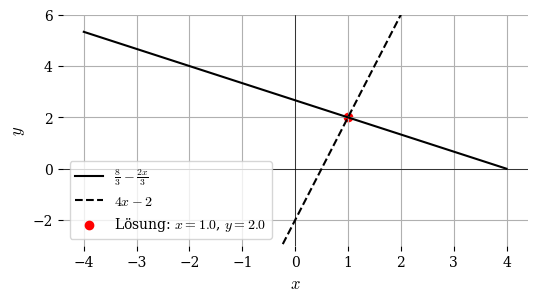

In [8]:
figure(figsize=[sx,sy])

x_n = linspace(-4,4, 200)
y1 = sp.lambdify(x,solution1[0])
y2 = sp.lambdify(x,solution2[0])

y_n = y1(x_n)
plot(x_n,y_n, label='$'+sp.latex(solution1[0])+'$')
y_n = y2(x_n)
plot(x_n,y_n, label='$'+sp.latex(solution2[0])+'$')


A = array([[a1,a2],[a3,a4]])
b = array([b1,b2])
sol = np.linalg.solve(A,b)
scatter(*sol,c='r', label=f'Lösung: $x={sol[0]}$, $y={sol[1]}$')

xlabel('$x$')
ylabel('$y$')

ylim([-3,6])
grid()

axhline(lw=0.5)
axvline(lw=0.5)
legend()
# plt.savefig('../plots/lgs_geom.pgf', bbox_inches='tight');

## 'Spalteninterpretation'
Darstellung als Linearkombination der Spaltenvektoren.

$$
x \color{red} \begin{bmatrix} 2 \\ 4 \end{bmatrix}  
 \color{white} +  y \color{green} \begin{bmatrix} 3 \\ -1 \end{bmatrix}  
=
\color{blue} \begin{bmatrix} 8 \\ 2 \end{bmatrix} $$

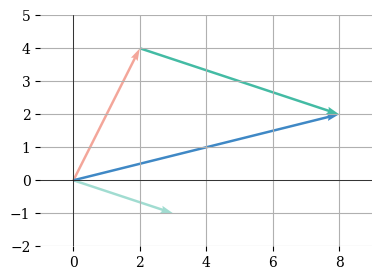

In [44]:
figure(figsize=[sy*(10/7),sy])

quiver([0],[0], [a1],[a3], angles='xy', scale_units='xy',scale=1, color='#E94F37', alpha=0.5)
quiver([0],[0], [a2],[a4],  angles='xy', scale_units='xy',scale=1, color='#44BBA4', alpha = 0.5)

quiver([0],[0], [b1],[b2],  angles='xy', scale_units='xy',scale=1, color='#3F88C5')

quiver([a1*sol[0]],[a3*sol[0]], [a2*sol[1]],[a4*sol[1]],  angles='xy', scale_units='xy',scale=1, color='#44BBA4')

xlim([-1,9])
ylim([-2,5])
axhline(lw=0.5)
axvline(lw=0.5)
grid()
plt.savefig('../plots/lgsGeomColumn.pgf', bbox_inches='tight');